<a href="https://colab.research.google.com/github/jdaniella039/Hands-on-Pemrosesan-Audio/blob/main/Tugas%201/122140039_JoyDaniella_TugasMultimedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Analisis Multimedia: Audio, Gambar, Video

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:**   Joy Daniella V.S
**NIM:** 122140039

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami representasi dasar data multimedia (audio, gambar, dan video) melalui praktik langsung memuat data, visualisasi, dan ekstraksi informasi fundamental. Anda akan bekerja dengan tiga jenis media berbeda untuk menganalisis karakteristik temporal (audio), spasial (gambar), dan spatio-temporal (video).

Fokus tugas adalah pada pemahaman konsep dasar representasi multimedia dan kemampuan interpretasi hasil visualisasi, **bukan** pada manipulasi atau transformasi lanjutan data multimedia.

---

## ⚠️ CATATAN PENTING: PRESENTASI ACAK & KEJUJURAN AKADEMIK

**Sebagian mahasiswa akan dipilih secara ACAK untuk presentasi singkat** (5-10 menit) menjelaskan kode dan interpretasi hasil mereka. Jika Anda:
- Tidak mampu menjelaskan kode yang Anda kumpulkan
- Hanya menyalin-tempel tanpa pemahaman
- Bergantung sepenuhnya pada AI tanpa memahami konsep

**Maka nilai tugas Anda akan diberikan 0 (nol).**

Gunakan referensi dan AI sebagai alat bantu pembelajaran, tetapi pastikan Anda memahami setiap baris kode dan dapat menjelaskan logika di baliknya.

In [ ]:
%pip install matplotlib

# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Library versions:
NumPy: 2.2.3
Matplotlib: 3.10.6
Librosa: 0.11.0
OpenCV: 4.12.0


## Petunjuk Umum Pengerjaan

### 📋 Cara Menggunakan Template
- Gunakan notebook ini sebagai kerangka kerja utama
- Tulis penjelasan (markdown) **SEBELUM** menaruh kode agar maksud dan tujuan jelas
- Tambahkan sel kode di tempat yang sudah disediakan (tandai dengan TODO)
- Semua plot/gambar harus diberi judul, label sumbu, dan keterangan singkat

### 📊 Standar Visualisasi
- Setiap plot harus memiliki judul yang deskriptif
- Label sumbu X dan Y harus jelas
- Gunakan colorbar untuk plot yang memerlukan skala warna
- Berikan interpretasi singkat setelah setiap visualisasi

### 📂 Struktur Data yang Direkomendasikan
- Buat folder `data/` di direktori yang sama dengan notebook
- Gunakan nama file yang deskriptif (contoh: `audio_musik_piano.wav`, `gambar_pemandangan_gunung.jpg`)
- Dokumentasikan sumber data jika menggunakan dataset publik

### ⚠️ Larangan
- **Jangan** menaruh seluruh pekerjaan dalam satu sel kode yang sangat panjang
- **Jangan** menempel hasil output tanpa interpretasi atau analisis
- **Jangan** bergantung sepenuhnya pada AI - pahami dan kuasai kode Anda

### 🎯 Persiapan Presentasi Acak
- Pastikan Anda memahami setiap baris kode yang ditulis
- Latih menjelaskan logika dan alur pemikiran Anda
- Siapkan penjelasan untuk setiap visualisasi dan interpretasinya

## Checklist Kelengkapan (Centang ✅ saat selesai)

### 🎵 Bagian Audio
- [✅] Muat audio dan tampilkan metadata (durasi, sample rate, jumlah kanal)
- [✅] Tampilkan waveform dengan label sumbu yang jelas
- [✅] Tampilkan spectrogram dalam skala log-dB dengan colorbar
- [✅] Tampilkan MFCC (minimal 13 koefisien) sebagai heatmap
- [✅] Berikan interpretasi dan analisis untuk setiap visualisasi audio

### 🖼️ Bagian Gambar
- [✅] Tampilkan gambar dengan benar dalam format RGB
- [✅] Tampilkan informasi dasar (dimensi, jumlah kanal, dtype)
- [✅] Tampilkan histogram warna untuk channel R, G, B
- [✅] Berikan analisis hubungan histogram dengan kesan visual gambar

### 📹 Bagian Video
- [✅] Tampilkan metadata video (resolusi, fps, frame count, durasi)
- [✅] Tampilkan 3 frame representatif (awal, tengah, akhir)
- [✅] Konversi BGR ke RGB dengan benar untuk visualisasi
- [✅] Analisis kesesuaian parameter video dengan use case

### 📝 Analisis & Dokumentasi
- [✅] Setiap bagian memiliki interpretasi dan analisis ringkas
- [✅] Perbandingan representasi ketiga jenis media
- [✅] Kesimpulan pembelajaran dan refleksi
- [✅] Semua sumber data dan referensi dicantumkan

# Pendahuluan

## Apa itu Data Multimedia?

Data multimedia adalah informasi yang dikodekan dalam berbagai format untuk merepresentasikan dunia nyata:

- **Audio (1D)**: Sinyal satu dimensi yang berubah terhadap waktu
  - Contoh: musik, suara, speech
  - Representasi: amplitudo vs waktu
  
- **Gambar (2D)**: Matriks nilai intensitas dalam ruang dua dimensi
  - Contoh: foto, ilustrasi, grafik
  - Representasi: intensitas pixel pada koordinat (x,y)
  
- **Video (2D + Waktu)**: Rangkaian frame (gambar) yang ditampilkan berurutan
  - Contoh: film, rekaman, animasi
  - Representasi: frame berubah terhadap waktu dengan frame rate tertentu

## Tujuan Tugas

Memahami representasi dasar dan teknik visualisasi fundamental untuk setiap jenis media multimedia, termasuk:
- Cara memuat dan membaca file multimedia
- Ekstraksi informasi metadata yang penting
- Visualisasi yang informatif dan mudah dipahami
- Interpretasi hasil analisis secara kontekstual

## Cara Kerja

1. Isi setiap bagian sesuai instruksi yang diberikan
2. Tambahkan sel kode di tempat yang ditandai dengan "TODO"
3. Berikan interpretasi dan analisis setelah setiap visualisasi
4. Pastikan semua plot memiliki judul, label, dan keterangan yang jelas

# Bagian A — Audio

### A1. Deskripsi Data

**TODO:** Jelaskan audio yang akan Anda analisis:
- Jenis audio: Musik
- Sumber: Dataset Publik
- Format file: WAV
- Alasan pemilihan: File audio musik dengan vokal dipilih karena memberikan variasi sinyal yang lebih kompleks dibandingkan musik instrumental. Campuran antara suara instrumen dan penyanyi memungkinkan analisis pola frekuensi yang lebih beragam serta dinamika suara yang lebih nyata.

**Path file:** `data/fancy.wav`

---



### A2. TODO: Muat & Metadata

**Instruksi:**
Tulis kode untuk memuat file audio dan menampilkan metadata dasar:
- Sample rate (Hz)
- Durasi (detik)
- Jumlah kanal (mono/stereo)
- Jumlah total sampel

**Catatan:** Jika file MP3 bermasalah saat loading, gunakan format WAV sebagai alternatif.

*(Tambahkan sel kode di sini)*

---

In [ ]:
# Path ke file audio
audio_path = 'data/fancy.wav'

# Membuka file WAV
with wave.open(audio_path, 'rb') as wav_file:
    # Ambil metadata
    sample_rate = wav_file.getframerate()
    num_channels = wav_file.getnchannels()
    num_frames = wav_file.getnframes()
    duration = num_frames / sample_rate

    # Tampilkan metadata
    print("Metadata Audio:")
    print(f"- Sample rate: {sample_rate} Hz")
    print(f"- Durasi: {duration:.2f} detik")
    print(f"- Jumlah kanal: {num_channels} ({'Mono' if num_channels == 1 else 'Stereo'})")
    print(f"- Jumlah total sampel: {num_frames}")

Metadata Audio:
- Sample rate: 44100 Hz
- Durasi: 59.98 detik
- Jumlah kanal: 2 (Stereo)
- Jumlah total sampel: 2645039



### A3. TODO: Waveform

**Instruksi:**
Plot waveform audio dengan:
- Sumbu X: waktu (detik)
- Sumbu Y: amplitudo
- Judul dan label sumbu yang jelas

**Analisis yang diperlukan:**
Jelaskan apa yang Anda lihat dari waveform (pola amplitudo, bagian keras/pelan, dll.)

*(Tambahkan sel kode di sini)*

---


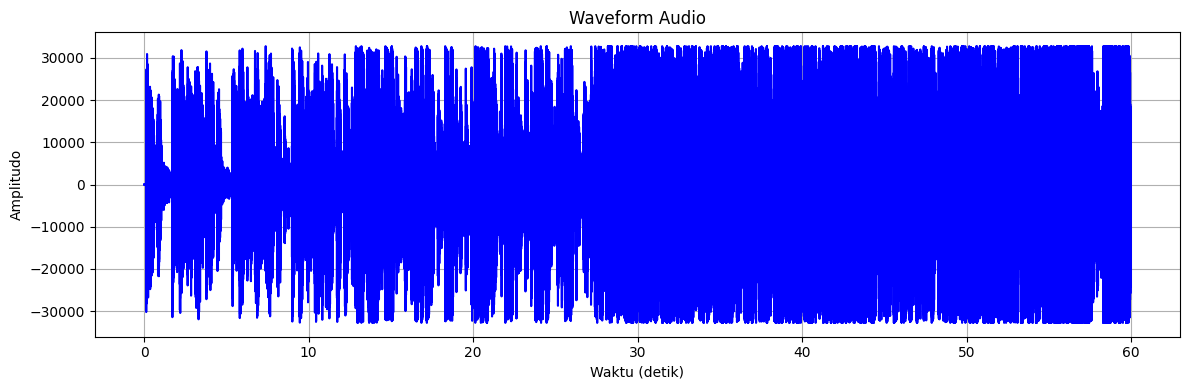

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Path ke file audio
audio_path = 'data/fancy.wav'

# Membuka file WAV
with wave.open(audio_path, 'rb') as wav_file:
    sample_rate = wav_file.getframerate()
    num_channels = wav_file.getnchannels()
    num_frames = wav_file.getnframes()
    duration = num_frames / sample_rate

    # Membaca semua frame dan konversi ke array numpy
    audio_frames = wav_file.readframes(num_frames)
    audio_data = np.frombuffer(audio_frames, dtype=np.int16)

    # Jika stereo, ambil hanya satu kanal untuk visualisasi
    if num_channels == 2:
        audio_data = audio_data[::2]

    # Buat array waktu untuk sumbu X
    time_axis = np.linspace(0, duration, num=len(audio_data))

# Plot waveform
plt.figure(figsize=(12, 4))
plt.plot(time_axis, audio_data, color='blue')
plt.title('Waveform Audio')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.tight_layout()
plt.show()


Analisis: Waveform audio ini menunjukkan variasi intensitas suara selama 60 detik. Pada awal 20 detik pertama, amplitudo naik turun tajam menandakan bagian keras bercampur jeda. Di pertengahan sekitar 30 detik, gelombang sangat rapat dan penuh, menunjukkan suara dominan dan konsisten keras. Setelah 30 detik hingga mendekati 50 detik, intensitas mulai menurun dengan lebih banyak bagian tenang. Menjelang akhir, amplitudo masih ada namun tidak sepadat bagian tengah, sehingga terdengar lebih pelan. Secara keseluruhan, audio ini dimulai bervariasi, memuncak keras di tengah, lalu mereda di akhir.



### A4. TODO: Spectrogram log-dB

**Instruksi:**
Hitung STFT dan tampilkan spectrogram dalam skala log-dB:
- Gunakan parameter standar (n_fft=1024, hop_length=256)
- Tampilkan dengan colorbar
- Label sumbu: waktu (detik) dan frekuensi (Hz)

**Analisis yang diperlukan:**
Jelaskan perbedaan informasi yang didapat dari spectrogram dibanding waveform.

*(Tambahkan sel kode di sini)*

---


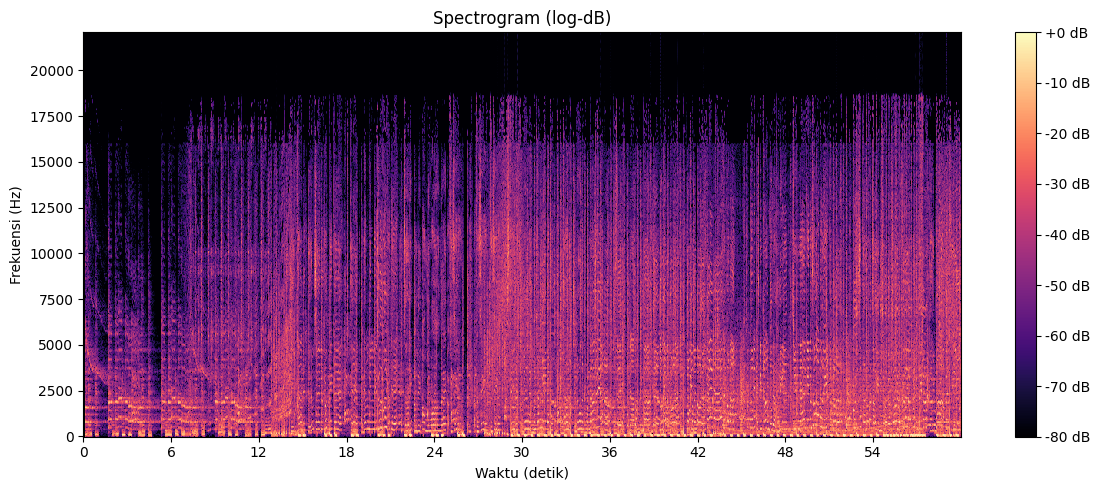

In [ ]:
# Path ke file audio
audio_path = 'data/fancy.wav'

# Muat audio
y, sr = librosa.load(audio_path, sr=None)

# Hitung STFT
n_fft = 1024
hop_length = 256
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Konversi ke skala log-dB
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot spectrogram
plt.figure(figsize=(12, 5))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (log-dB)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.tight_layout()
plt.show()


Analisis: Waveform menggambarkan perubahan amplitudo terhadap waktu, sehingga lebih menekankan keras pelannya suara tanpa menunjukkan isi frekuensinya. Sebaliknya, spectrogram menampilkan distribusi frekuensi sepanjang waktu dengan intensitas ditunjukkan oleh warna. Dari spectrogram ini terlihat frekuensi rendah selalu hadir, sementara frekuensi menengah dan tinggi muncul lebih bervariasi terutama di bagian tengah durasi. Jadi, waveform fokus pada dinamika volume, sedangkan spectrogram memberi gambaran lengkap tentang karakter bunyi.


### A5. TODO: MFCC

**Instruksi:**
Hitung dan tampilkan minimal 13 koefisien MFCC sebagai heatmap:
- Sumbu X: waktu (frame)
- Sumbu Y: koefisien MFCC (1-13)
- Gunakan colorbar dan judul yang jelas

**Analisis yang diperlukan:**
Interpretasi sederhana: apakah pola MFCC stabil atau berubah-ubah? Apa potensi maknanya?

*(Tambahkan sel kode di sini)*

---


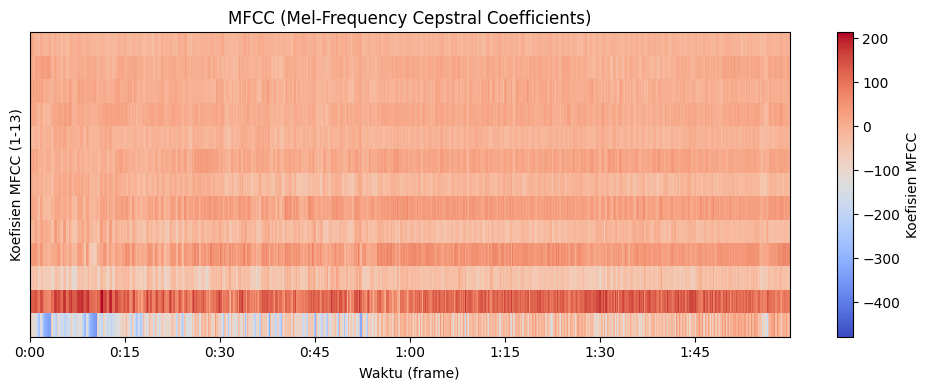

In [ ]:
# Path ke file audio
audio_path = 'data/fancy.wav'

# Muat audio
y, sr = librosa.load(audio_path, sr=None)

# Hitung MFCC (minimal 13 koefisien)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCC sebagai heatmap
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(label='Koefisien MFCC')
plt.title('MFCC (Mel-Frequency Cepstral Coefficients)')
plt.ylabel('Koefisien MFCC (1-13)')
plt.xlabel('Waktu (frame)')
plt.tight_layout()
plt.show()


Analisis: Pola MFCC pada grafik ini terlihat cukup stabil dari awal hingga akhir durasi. Warna yang muncul cenderung seragam, terutama pada bagian koefisien menengah dan atas, menandakan bahwa karakteristik spektral suara tidak banyak mengalami perubahan. Hanya pada beberapa koefisien rendah terlihat sedikit variasi warna biru dan merah yang menunjukkan adanya perbedaan kecil, namun secara umum pola tetap konsisten. Stabilitas ini dapat diartikan bahwa audio memiliki tekstur suara yang relatif konstan, misalnya musik dengan ritme yang berulang atau suara yang monoton tanpa banyak variasi nada maupun timbre.


### A6. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

1. **Perbedaan insight:** Apa perbedaan informasi yang didapat dari waveform versus spectrogram?

   *Waveform hanya menunjukkan perubahan amplitudo terhadap waktu, sehingga kita bisa tahu kapan suara terdengar keras atau pelan, tapi tidak memberi informasi detail tentang nada atau frekuensi yang muncul. Sebaliknya, spectrogram menampilkan distribusi frekuensi pada tiap detik, sehingga kita bisa melihat nada atau rentang frekuensi apa saja yang dominan di waktu tertentu. Dengan kata lain, waveform fokus pada dinamika volume, sementara spectrogram memberikan gambaran isi suara secara lebih lengkap.*

2. **Pembelajaran dari MFCC:** Apa yang Anda pelajari dari visualisasi MFCC audio ini?

   *Visualisasi MFCC memperlihatkan pola spektral yang lebih dekat dengan persepsi pendengaran manusia. Jika warnanya cenderung stabil, berarti karakter suara relatif konstan, misalnya piano yang dimainkan dengan cara seragam. Sebaliknya, jika warnanya sering berubah, itu menandakan adanya variasi nada, dinamika permainan, atau perubahan timbre. Pada grafik ini, pola MFCC terlihat cukup stabil, sehingga bisa disimpulkan suara cenderung konsisten tanpa banyak variasi.*

# Bagian B — Gambar

### B1. Deskripsi Data

**TODO:** Jelaskan gambar yang akan Anda analisis:
- Jenis gambar: Emoticon Pixel Art
- Sumber: Pinterest
- Format file: JPG
- Alasan pemilihan:  Saya memilih gambar emoticon pixel art ini karena bentuknya sederhana, warna dominan kuning, dan mudah dianalisis secara visual maupun histogram. Emoticon juga sering digunakan di media sosial dan aplikasi chatting, sehingga relevan untuk memahami representasi gambar digital yang sering dijumpai sehari-hari. Selain itu, gambar pixel art punya pola warna yang jelas dan blok-blok pixel yang kontras, cocok untuk belajar analisis spasial dan distribusi warna.

**Path file:** `data/image.jpg`

---


### B2. TODO: Baca & Tampilkan (RGB)

**Instruksi:**
Baca gambar dan tampilkan dengan benar dalam format RGB:
- Pastikan konversi warna benar (ingat perbedaan BGR vs RGB di OpenCV)
- Berikan judul yang deskriptif
- Hilangkan axis untuk tampilan yang bersih

**Analisis yang diperlukan:**
Jelaskan gambar secara ringkas (objek dominan, kondisi pencahayaan, komposisi warna).

*(Tambahkan sel kode di sini)*

---


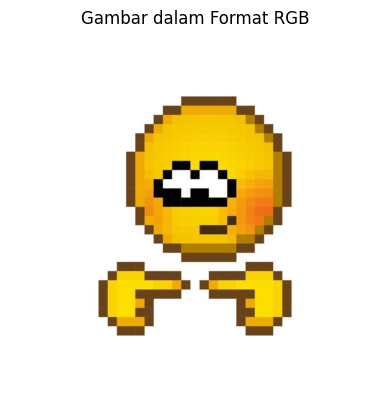

In [ ]:
img_path = 'data/image.jpg'

# Membaca gambar dalam format BGR (default OpenCV)
image_bgr = cv2.imread(img_path)

# Konversi dari BGR ke RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Menampilkan gambar dengan judul deskriptif dan tanpa axis
plt.imshow(image_rgb)
plt.title('Gambar dalam Format RGB')
plt.axis('off')
plt.show()

Analisis: Gambar ini menampilkan sebuah emoji bergaya piksel sebagai objek dominan. Emoji berbentuk wajah bulat berwarna kuning dengan ekspresi malu atau ragu, ditandai dengan pipi memerah dan kedua tangan menunjuk ke arah dalam. Pencahayaan tampak netral karena latar belakang putih polos tanpa bayangan, sehingga fokus hanya tertuju pada objek. Komposisi warna didominasi oleh gradasi kuning untuk wajah dan tangan, sedikit merah pada pipi, serta hitam dan putih pada mata dan mulut, menghasilkan kesan sederhana namun ekspresif.


### B3. TODO: Informasi Dasar

**Instruksi:**
Tampilkan informasi metadata gambar:
- Dimensi (Height × Width)
- Jumlah kanal
- Tipe data (dtype)
- Mode warna (jika relevan)
- Ukuran file dalam memori

**Analisis yang diperlukan:**
Jelaskan mengapa informasi ini penting untuk tahap preprocessing atau analisis lanjutan.

*(Tambahkan sel kode di sini)*

---


In [ ]:
image_path = 'data/image.jpg'

# Membaca gambar
image = cv2.imread(image_path)

if image is not None:
    # Mendapatkan dimensi dan jumlah kanal
    height, width, channels = image.shape

    # Mendapatkan tipe data
    dtype = image.dtype

    # Estimasi ukuran file dalam memori (dalam byte)
    memory_size_bytes = image.nbytes
    memory_size_kb = memory_size_bytes / 1024

    # Menampilkan informasi metadata
    print("Informasi Metadata Gambar:")
    print(f"- Dimensi: {height} × {width}")
    print(f"- Jumlah Kanal: {channels}")
    print(f"- Tipe Data: {dtype}")
    print(f"- Ukuran File dalam Memori: {memory_size_kb:.2f} KB")


Informasi Metadata Gambar:
- Dimensi: 736 × 736
- Jumlah Kanal: 3
- Tipe Data: uint8
- Ukuran File dalam Memori: 1587.00 KB


Analisis: Metadata gambar ini penting karena membantu menentukan langkah preprocessing yang tepat. Dimensi 736 × 736 piksel menunjukkan resolusi yang mungkin perlu di-resize agar seragam dengan data lain. Tiga kanal menandakan format RGB, sehingga bisa diproses dalam warna atau diubah ke grayscale sesuai kebutuhan. Tipe data uint8 dengan rentang 0–255 biasanya dinormalisasi agar lebih efisien untuk komputasi. Ukuran file 1587 KB juga berpengaruh pada penggunaan memori dan kecepatan jika dataset besar. Dengan informasi ini, data bisa dipersiapkan lebih konsisten dan optimal untuk analisis.


### B4. TODO: Histogram Warna

**Instruksi:**
Tampilkan histogram distribusi intensitas untuk channel R, G, B:
- Range: 0-255
- Plot terpisah atau overlay dengan warna sesuai channel
- Label sumbu: intensitas pixel dan frekuensi
- Legend yang jelas

**Analisis yang diperlukan:**
Analisis: channel mana yang dominan? Bagaimana kontras gambar? Seperti apa sebaran intensitasnya?

*(Tambahkan sel kode di sini)*

---


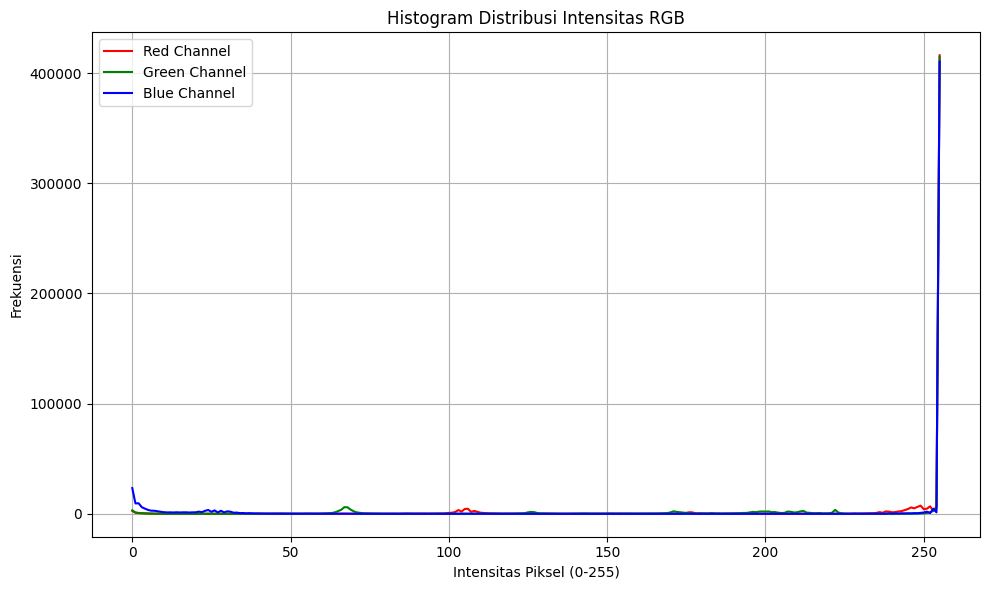

In [ ]:
# Path ke file gambar
image_path = 'data/image.jpg'

# Membaca gambar dalam format BGR
image_bgr = cv2.imread(image_path)

if image_bgr is not None:
    # Konversi ke RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Pisahkan channel R, G, B
    R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

    # Hitung histogram untuk masing-masing channel
    hist_R = cv2.calcHist([image_rgb], [0], None, [256], [0,256])
    hist_G = cv2.calcHist([image_rgb], [1], None, [256], [0,256])
    hist_B = cv2.calcHist([image_rgb], [2], None, [256], [0,256])

    # Plot histogram
    plt.figure(figsize=(10,6))
    plt.plot(hist_R, color='red', label='Red Channel')
    plt.plot(hist_G, color='green', label='Green Channel')
    plt.plot(hist_B, color='blue', label='Blue Channel')
    plt.title('Histogram Distribusi Intensitas RGB')
    plt.xlabel('Intensitas Piksel (0-255)')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Analisis: Histogram menunjukkan bahwa ketiga channel (merah, hijau, biru) memiliki distribusi yang mirip, dengan puncak yang sangat tinggi pada intensitas 255. Hal ini menandakan dominasi warna terang atau putih pada gambar, sesuai dengan latar belakang putih polos. Sebaran intensitasnya cenderung terkonsentrasi di dua titik: sangat rendah (dekat 0) yang muncul pada garis luar atau detail gelap, serta sangat tinggi (dekat 255) pada bagian latar. Kontras gambar bisa dikatakan cukup tinggi, karena ada kombinasi antara area gelap pekat dan terang maksimal, sementara intensitas menengah relatif sedikit. Dengan demikian, gambar ini lebih banyak menampilkan area terang dengan detail kecil pada bagian gelap.


### B5. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Relasi histogram dengan kesan visual:** Apa hubungan antara pola histogram yang Anda lihat dengan kesan visual gambar (terang/gelap, warna dominan, kontras)?

Jawaban: Histogram menunjukkan puncak sangat tinggi pada intensitas 255 di semua channel, yang sesuai dengan latar belakang putih terang pada gambar. Selain itu, ada distribusi kecil di intensitas rendah yang merepresentasikan bagian gelap seperti garis tepi dan detail wajah emoji. Pola ini menghasilkan kesan visual yang cerah dengan dominasi warna kuning dari kombinasi merah dan hijau, sementara biru relatif lebih sedikit. Karena distribusinya terkonsentrasi di area gelap dan terang, kontras gambar terlihat cukup tinggi sehingga detail kecil jelas menonjol di atas latar belakang polos yang terang.

# Bagian C — Video

### C1. Deskripsi Data

**TODO:** Jelaskan video yang akan Anda analisis:
- Jenis video: Video Random
- Sumber: Pinterest
- Durasi target: 6 detik
- Alasan pemilihan: Video ini dipilih karena berdurasi singkat dengan konten sederhana, sehingga mudah dianalisis dari sisi visual dan audio. Elemen gambar dan suara yang berpadu di dalamnya memberikan variasi sinyal menarik untuk diamati pola pergerakan visual serta dinamika audionya.

**Path file:** `data/video.mp4`

---



### C2. TODO: Baca & Metadata

**Instruksi:**
Baca video dengan OpenCV dan tampilkan metadata:
- Resolusi (Width × Height)
- Frame rate (fps)
- Jumlah total frame
- Durasi (detik)
- Klasifikasi resolusi (HD, Full HD, 4K, dll.)

**Analisis yang diperlukan:**
Jelaskan pentingnya parameter-parameter tersebut untuk analisis video atau aplikasi tertentu.

*(Tambahkan sel kode di sini)*

---


In [ ]:
# Path ke file video
video_path = 'data/video.mp4'

# Membuka video
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    # Ambil metadata
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps if fps > 0 else 0

    # Klasifikasi resolusi
    if width >= 3840 and height >= 2160:
        resolution_class = "4K"
    elif width >= 1920 and height >= 1080:
        resolution_class = "Full HD"
    elif width >= 1280 and height >= 720:
        resolution_class = "HD"
    else:
        resolution_class = "SD or lower"

    # Tampilkan metadata
    print("Metadata Video:")
    print(f"- Resolusi: {width} × {height}")
    print(f"- Frame rate: {fps:.2f} fps")
    print(f"- Jumlah total frame: {total_frames}")
    print(f"- Durasi: {duration:.2f} detik")
    print(f"- Klasifikasi resolusi: {resolution_class}")


Metadata Video:
- Resolusi: 400 × 390
- Frame rate: 30.00 fps
- Jumlah total frame: 188
- Durasi: 6.27 detik
- Klasifikasi resolusi: SD or lower


Analisis: Metadata video ini menunjukkan bahwa resolusi 400 × 390 termasuk rendah, sehingga detail visual yang bisa ditangkap terbatas namun membuat ukuran file lebih kecil dan ringan diproses. Frame rate 30 fps tergolong standar dan sudah cukup untuk menghasilkan gerakan yang terlihat mulus, sehingga masih sesuai untuk penggunaan umum. Dengan total 188 frame dan durasi 6,27 detik, video ini tergolong singkat sehingga lebih cocok untuk analisis cepat atau cuplikan pendek. Informasi seperti resolusi, frame rate, jumlah frame, dan durasi penting karena menentukan sejauh mana video bisa dimanfaatkan. Untuk analisis sederhana seperti pelacakan gerakan atau deteksi objek dasar, video ini masih memadai, tetapi untuk aplikasi yang membutuhkan detail tinggi seperti pengenalan wajah atau analisis medis, resolusinya bisa menjadi kendala.


### C3. TODO: Tampilkan 3 Frame (Awal–Tengah–Akhir)

**Instruksi:**
Ambil dan tampilkan 3 frame representatif:
- Frame pertama (index 0)
- Frame tengah (index ~total_frame/2)
- Frame terakhir (index total_frame-1)
- **Konversi BGR→RGB** sebelum ditampilkan
- Subplot dengan judul frame dan timestamp

**Analisis yang diperlukan:**
Deskripsikan perbedaan visual antar frame dan apa yang dapat dipelajari dari sampel frame ini.

*(Tambahkan sel kode di sini)*

---


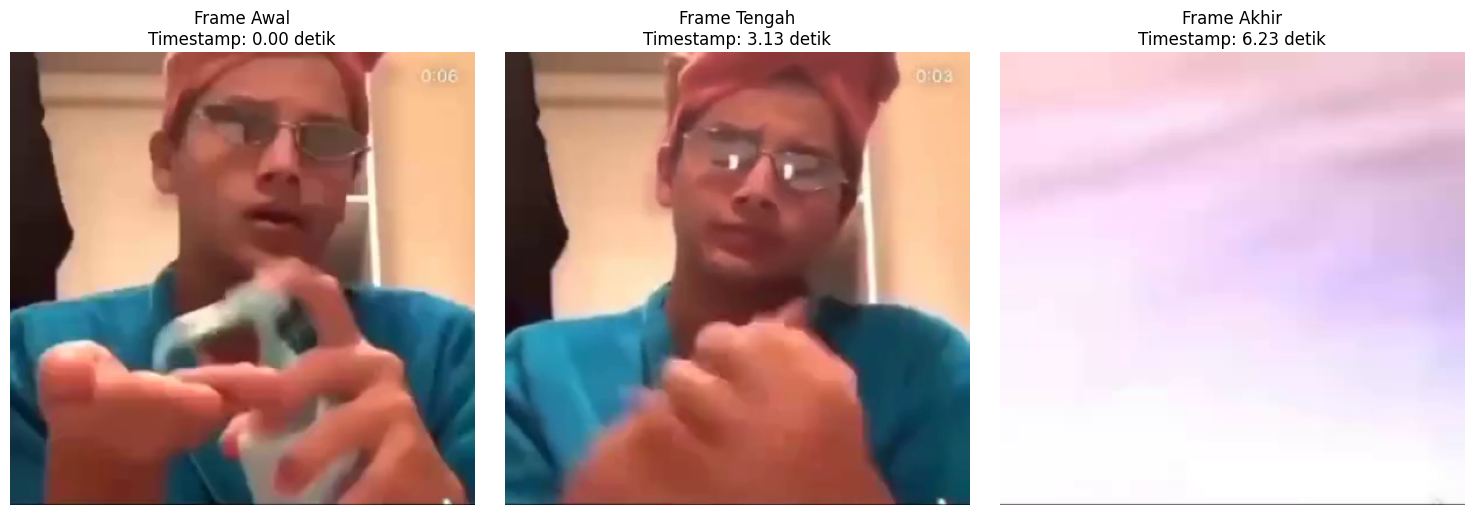

In [ ]:
video_path = 'data/video.mp4'

# Membuka video
cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    # Ambil metadata
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Tentukan index frame
    frame_indices = [0, total_frames // 2, total_frames - 1]
    frames_rgb = []
    timestamps = []

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            # Konversi BGR ke RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames_rgb.append(frame_rgb)
            timestamps.append(idx / fps)
        else:
            frames_rgb.append(None)
            timestamps.append(None)

    # Tampilkan frame dalam subplot
    plt.figure(figsize=(15, 5))
    titles = ['Frame Awal', 'Frame Tengah', 'Frame Akhir']
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        if frames_rgb[i] is not None:
            plt.imshow(frames_rgb[i])
            plt.title(f"{titles[i]}\nTimestamp: {timestamps[i]:.2f} detik")
            plt.axis('off')
        else:
            plt.text(0.5, 0.5, 'Frame tidak tersedia', ha='center', va='center')
            plt.axis('off')
    plt.tight_layout()
    plt.show()


Analisis: Pada frame awal terlihat seseorang memegang benda sambil membuka telapak tangan, lalu pada frame tengah gerakan berubah menjadi menggosok tangan dengan ekspresi yang hampir sama. Pada frame akhir, objek utama sudah hilang dan hanya tampak warna pudar menyerupai transisi. Dari ketiga frame ini terlihat bahwa video menampilkan rangkaian gerakan singkat, dengan frame awal dan tengah memuat aktivitas utama, sedangkan frame akhir lebih mencerminkan bagian penutup.

### C4. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Kesesuaian parameter:** Apakah fps dan resolusi video ini sesuai untuk use case pilihan Anda (misalnya: media sosial, kuliah daring, presentasi, dll.)? Jelaskan alasan singkat.

Jawaban: Dengan frame rate 30 fps, video ini sudah cukup mulus untuk ditampilkan di media sosial atau keperluan komunikasi daring. Namun, resolusi 400 × 390 tergolong rendah sehingga detail visual terbatas. Untuk konten ringan seperti unggahan singkat di media sosial, resolusi ini masih dapat diterima. Sebaliknya, untuk kebutuhan presentasi formal atau kuliah daring yang menuntut kejelasan teks dan detail visual, resolusi ini kurang memadai karena bisa membuat gambar terlihat buram.

# Perbandingan & Kesimpulan

## Perbandingan Representasi Media

**TODO:** Bandingkan secara ringkas representasi dan visualisasi ketiga media:

### Audio (1D - Temporal)
- Representasi: Sinyal amplitudo terhadap waktu.
- Visualisasi utama: Waveform, spectrogram, dan MFCC.
- Informasi yang diperoleh: Dinamika keras pelan suara, distribusi frekuensi sepanjang waktu, serta ciri khas spektral yang mencerminkan karakter bunyi.

### Gambar (2D - Spasial)  
- Representasi: Matriks piksel dengan nilai intensitas (grayscale) atau kanal warna (RGB).
- Visualisasi utama: Tampilan RGB, histogram intensitas, dan metadata.
- Informasi yang diperoleh: Komposisi warna, distribusi terang-gelap, kontras, serta detail spasial yang membentuk objek dominan.

### Video (2D + Waktu - Spatio-temporal)
- Representasi: Rangkaian frame gambar berurutan dengan dimensi spasial dan dimensi temporal.
- Visualisasi utama: Cuplikan frame, metadata (resolusi, fps, durasi), serta analisis transisi antar frame.
- Informasi yang diperoleh: Gerakan atau perubahan visual dari waktu ke waktu, kelancaran tampilan, kualitas resolusi, dan konteks aktivitas dalam urutan adegan.

---



## Refleksi Pembelajaran

### 3 Poin yang Saya Pelajari:
1. Waveform hanya menunjukkan dinamika keras-pelannya suara, sedangkan spectrogram dan MFCC memberikan informasi detail tentang isi frekuensi dan karakter bunyi.
2. Metadata gambar (dimensi, kanal, tipe data, ukuran) sangat penting untuk preprocessing agar data konsisten dan efisien sebelum analisis lebih lanjut.
3. Dalam video, resolusi dan fps berpengaruh besar pada kualitas visual serta kesesuaian untuk berbagai use case, misalnya cukup untuk media sosial tapi kurang ideal untuk presentasi formal.

### 2 Hal yang Masih Membingungkan/Ingin Diperdalam:
1. Bagaimana cara optimasi preprocessing audio dan gambar agar tidak kehilangan detail penting namun tetap ringan secara komputasi.
2. Teknik lanjutan untuk menganalisis pola video secara otomatis, misalnya deteksi gerakan atau segmentasi adegan yang lebih kompleks.

---



## Sumber Data & Referensi

**TODO:** Cantumkan semua sumber data dan referensi yang digunakan:

- **Audio:** Dataset Publik (fancy.wav)
- **Gambar:** Pinterest (image.jpg)
- **Video:** Pinterest (video.mp4)
- **Referensi teknis:**  Matplotlib, Materi Kuliah dan OpenAI GPT

Dibantu Oleh Teman Saya: Gabriella (122140056)

# Rubrik Penilaian

## Distribusi Bobot Penilaian

| **Aspek Penilaian** | **Bobot** | **Deskripsi** |
|---|---|---|
| **Kelengkapan** | **35%** | Semua langkah inti dikerjakan sesuai checklist |
| **Kualitas Visualisasi** | **20%** | Judul, label sumbu, colorbar, legend, keterbacaan plot |
| **Analisis & Interpretasi** | **30%** | Kemampuan interpretasi hasil, bukan sekadar output mentah |
| **Kerapihan & Struktur** | **10%** | Markdown jelas, kode modular, dokumentasi baik |
| **Orisinalitas & Penguasaan** | **5%** | Pemahaman saat presentasi acak |

---

## Detail Kriteria Penilaian

### 🏆 Kelengkapan (35%)
- ✅ Semua 4 visualisasi audio (metadata, waveform, spectrogram, MFCC)
- ✅ Semua 3 visualisasi gambar (display RGB, metadata, histogram)  
- ✅ Semua 2 visualisasi video (metadata, frame extraction)
- ✅ Analisis ringkas untuk setiap bagian

### 📊 Kualitas Visualisasi (20%)
- Plot memiliki judul yang informatif dan deskriptif
- Label sumbu X dan Y jelas dan sesuai
- Colorbar/legend tersedia jika diperlukan
- Ukuran plot proporsional dan mudah dibaca

### 🧠 Analisis & Interpretasi (30%)
- Interpretasi menunjukkan pemahaman konsep
- Analisis kontekstual, bukan sekadar deskripsi output
- Mampu menghubungkan hasil dengan teori
- Refleksi pembelajaran yang thoughtful

### 📝 Kerapihan & Struktur (10%)
- Markdown terstruktur dengan heading yang konsisten
- Kode bersih, terkompartemen, dan mudah dibaca
- Dokumentasi yang memadai
- Flow logical dari satu bagian ke bagian lain

### 🎯 Orisinalitas & Penguasaan (5%)
- **PENTING:** Jika saat presentasi acak Anda tidak mampu menjelaskan kode yang Anda tulis atau menunjukkan ketergantungan buta pada AI/copy-paste, **nilai tugas akan dianggap 0**.
- Kemampuan menjelaskan logika dan alur pemikiran
- Pemahaman konsep di balik implementasi kode

## Proporsi Penilaian Total
- Proporsi penilaian hanya 80%, 20% lagi akan didasarkan pada kecepatan pengumpulan tugas
- Sehingga: 0.8 * penilaian dosen + nilai waktu pengumpulan

# Aturan Kejujuran Akademik

## 📖 Penggunaan Referensi & AI yang Diperbolehkan

Anda **BOLEH** menggunakan:
- ✅ Dokumentasi resmi library (NumPy, Matplotlib, Librosa, OpenCV)
- ✅ Tutorial dan contoh kode dari sumber terpercaya
- ✅ AI tools (ChatGPT, GitHub Copilot, dll.) sebagai **alat bantu pembelajaran**
- ✅ Diskusi dengan teman untuk pemahaman konsep

## ⚠️ Syarat & Batasan WAJIB

Namun Anda **HARUS**:
- 🧠 **Memahami setiap baris kode** yang Anda masukkan ke notebook
- 📝 **Menulis interpretasi dengan kata-kata sendiri**, bukan hasil copy-paste
- 📚 **Mencantumkan sumber data dan referensi** yang digunakan, termasuk transkrip percakapan dengan AI dalam link atau teks
- 🎯 **Mampu menjelaskan logika dan alur pemikiran** saat presentasi acak

## ❌ Pelanggaran yang Berakibat Nilai 0

- **Plagiarisme atau penyalinan buta** dari sumber manapun
- **Copy-paste kode tanpa pemahaman** dan tidak dapat menjelaskan
- **Menggunakan AI untuk mengerjakan seluruh tugas** tanpa pembelajaran personal
- **Tidak dapat menjawab pertanyaan dasar** tentang kode yang dikumpulkan
- **Menyalin pekerjaan teman** atau bekerjasama dalam pengerjaan individual

## 🎯 Persiapan Presentasi Acak

**Kemungkinan pertanyaan yang akan ditanyakan:**
- "Jelaskan mengapa Anda menggunakan parameter ini di STFT?"
- "Apa arti dari pola yang terlihat di MFCC?"
- "Mengapa perlu konversi BGR ke RGB?"
- "Interpretasikan hasil histogram yang Anda buat"
- "Bagaimana cara kerja spectrogram?"

**Tips sukses:**
- Pahami konsep dasar setiap teknik yang digunakan
- Latih menjelaskan dengan bahasa sederhana
- Siapkan justifikasi untuk setiap pilihan parameter
- Kuasai interpretasi setiap visualisasi yang dibuat

# Panduan Pengumpulan

## 📁 Berkas yang Harus Dikumpulkan

### Wajib:
1. **Notebook Jupyter** (.ipynb) dengan nama: `NIM_Nama_TugasMultimedia.ipynb`
   - Contoh: `123456789_JohnDoe_TugasMultimedia.ipynb`
2. **PDF hasil render dari notebook**

---

## 📅 Informasi Pengumpulan

---

## ✅ Checklist Sebelum Submit

- [✅] Semua cell sudah dijalankan dan menampilkan output
- [✅] Nama file sesuai format: `NIM_Worksheet2.ipynb` dan `NIM_Worksheet2.pdf`
- [✅] Semua TODO sudah diisi dengan lengkap
- [✅] Analisis dan interpretasi sudah ditulis untuk setiap bagian
- [✅] Sumber data dan referensi sudah dicantumkan

---

### Export ke PDF:
- File → Save and Export Notebook As →  HTML
- Buka HTML di browser -> Save as PDF